In this notbook we are testing how the model responds when it is asked to produce three outputs from one input. One of the outputs will be equal to the input, and another the quotient of the other two.

First we import the required libraries. `numpy` is used to allow us to manipulate arrays with efficiency. `pandas` gives us access to Panda Dataframes which are the preferred way of storing our data. `matplotlib.pyplot` lets us plot graphs with our data. `twinlab` is the main library we are using. The libraries are renamed using `as` for convenience. 

In [1]:
# Third-party imports
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

# Project imports
import twinlab as tl


         === TwinLab Client Initialisation ===
         Training : https://pdersvjxmgrkqojwyeyocqm7le0iwtkx.lambda-url.eu-west-2.on.aws/
         Server   : https://mt9w8ln59j.execute-api.eu-west-2.amazonaws.com/dev
         Group    : digilab
         User     : tim



In this cell we train the model on our training data. We also set `n` to the number of items of training data we want.
- We give it the first output $y_1$ which is an array of `n` length filled with float numbers between 0 and 1.
- We give it the third output $y_3$ which is an array of `n` evenly spaced numbers between 0 and 1.
- We define the second output $y_2$ as an array, where each element is the corresponding $y_3$ element divided by the corresponding $y_1$ element.
- The only input is $X$, which is equal to $y_3$ plus a small amount of random noise.

In [2]:
dataset_id = "three_outputs.csv"
campaign_id = "three_outputs"

#Training Data
n = 100
y1 = np.random.rand(n)
y3 = np.linspace(0, 1, n) 
y2 = y3/y1
X = y3 + np.random.normal(0, 0.05, n)

train_data = pd.DataFrame({'X': X, 'y1': y1, 'y2':y2, "y3":y3})
print(train_data)

           X        y1        y2        y3
0   0.022098  0.309271  0.000000  0.000000
1  -0.002535  0.329204  0.030683  0.010101
2   0.040245  0.494394  0.040862  0.020202
3  -0.009681  0.204076  0.148489  0.030303
4   0.019094  0.180958  0.223279  0.040404
..       ...       ...       ...       ...
95  0.862719  0.833425  1.151388  0.959596
96  1.042859  0.555481  1.745688  0.969697
97  0.994274  0.270479  3.622454  0.979798
98  0.994975  0.597152  1.657701  0.989899
99  0.923602  0.750529  1.332393  1.000000

[100 rows x 4 columns]


In this cell we set the parameters we are going to train the model on.

In [3]:
#defines parameters for our prediction
prediction_params = {
    "filename": dataset_id,
    "inputs" : ["X"],
    "outputs": ["y1", "y2", "y3"],
}

We now upload the training data to the twinLab cloud.

Whenever `verbose = true` is an argument, the function returns information about what it is doing to the user. This generates the grey text below the cells when they are run.

In [4]:
tl.upload_dataset(train_data, dataset_name=dataset_id, verbose=True)

Response: Presigned URL generated successfully

Dataframe uploaded successfully.

Uploading three_outputs.csv
Response: Dataset three_outputs.csv processed successfully



`tl.list_datasets()` lets us check if the dataset we uploaded is in the right place.
`tl.query_dataset()` lets us view statistics about the data in our dataset.

In [5]:
_ = tl.list_datasets(verbose=True)
tl.query_dataset(dataset_id)

Response: Found 5 datasets

Datasets:
['adaas', 'basic', 'basic.csv', 'test.csv', 'three_outputs.csv']


,X,y1,y2,y3
count,100.000000,100.000000,100.000000,100.000000
mean,0.501182,0.496427,1.878629,0.500000
std,0.285294,0.289804,2.571069,0.293045
min,-0.009681,0.024605,0.000000,0.000000
25%,0.271323,0.266201,0.548153,0.250000
50%,0.485908,0.491863,1.041710,0.500000
75%,0.753935,0.754183,1.849765,0.750000
max,1.050143,0.992337,12.684329,1.000000


This cell trains the model on the dataset we provided, and within the parameters we provided.

In [6]:
tl.train_campaign(prediction_params, campaign_id, verbose=True)

Response: Training three_outputs complete



This simply lists the current models on the twinlab cloud.

In [7]:
_ = tl.list_campaigns(verbose=True)

Response: Found 2 campaigns

Campaigns:
['three_outputs', 'test']


This displays information about the model we are using.

In [8]:
_ = tl.query_campaign(campaign_id, verbose=True)

Response: Query of three_outputs campaign complete

Metadata:
{'inputs': ['X'],
 'outputs': ['y1', 'y2', 'y3'],
 'diagnostics': {'transformer_diagnostics': [],
                 'estimator_diagnostics': {'likelihood.noise_covar.raw_noise': [[0.9729533813782344],
                                                                                [0.9429580110122532],
                                                                                [0.024698210129539606]],
                                           'likelihood.noise_covar.noise_prior.concentration': 1.100000023841858,
                                           'likelihood.noise_covar.noise_prior.rate': 0.05000000074505806,
                                           'likelihood.noise_covar.raw_noise_constraint.lower_bound': 9.999999747378752e-05,
                                           'likelihood.noise_covar.raw_noise_constraint.upper_bound': inf,
                                           'mean_module.raw_constant': [-0.018

This cell creates the input data we are going to give to the model for it to predict the three outputs of. 
The data is currently 1001 (defined by `num_predictions`) evenly spaced numbers between 0 and 1.

We also put them in a Pandas Dataframe.

In [9]:
num_predictions = 1001
input_dict = {
    "X": np.linspace(0., 1., num_predictions).tolist()
}

prediction_inputs = pd.DataFrame(input_dict)
print(prediction_inputs)

          X
0     0.000
1     0.001
2     0.002
3     0.003
4     0.004
...     ...
996   0.996
997   0.997
998   0.998
999   0.999
1000  1.000

[1001 rows x 1 columns]


We then give these numbers to the model, and it generates what it thinks the three outputs should be. `df_mean` is the value it predicts. `df_std` is how uncertain the model is about that value.

In [10]:
print(prediction_inputs)
df_mean, df_std = tl.predict_campaign(prediction_inputs, campaign_id, verbose=True)

          X
0     0.000
1     0.001
2     0.002
3     0.003
4     0.004
...     ...
996   0.996
997   0.997
998   0.998
999   0.999
1000  1.000

[1001 rows x 1 columns]
Response: Prediction from three_outputs campaign complete

Mean: 
             y1        y2        y3
0     0.443338  0.533109  0.023412
1     0.443509  0.534948  0.023996
2     0.443681  0.536802  0.024583
3     0.443854  0.538671  0.025171
4     0.444028  0.540555  0.025762
...        ...       ...       ...
996   0.573348  2.128335  0.965733
997   0.573230  2.127067  0.966143
998   0.573111  2.125798  0.966549
999   0.572992  2.124528  0.966952
1000  0.572871  2.123258  0.967352

[1001 rows x 3 columns] 

Std: 
             y1        y2        y3
0     0.069534  0.626018  0.017917
1     0.069349  0.624218  0.017760
2     0.069166  0.622425  0.017604
3     0.068983  0.620638  0.017450
4     0.068801  0.618857  0.017299
...        ...       ...       ...
996   0.069502  0.621917  0.016368
997   0.069679  0.623672  0.01

Now we plot the data on 3 graphs - one for X against $y_1$, one for X against $y_2$, and one for X against $y_3$.
- The black dots on the graph are the training data we gave it. 
- The darkest blue line in the graph is the `df_mean` value.
- The blue sections either side represent the range of uncertainty in the `df_mean` value.

$y_1$ settles to around a value of 0.5.
$y_2$'s average will increase the more numbers the model predicts, currently at around 2 - but with more data it would increase.
$y_2$ also has some enourmously high values which occur whenever $y_1$ is a very tiny number, so the result of the division is very high. 
The third graph shows the model is good at predicting $y_3$, because the training data shows it is the same as the $X$ value it is given.

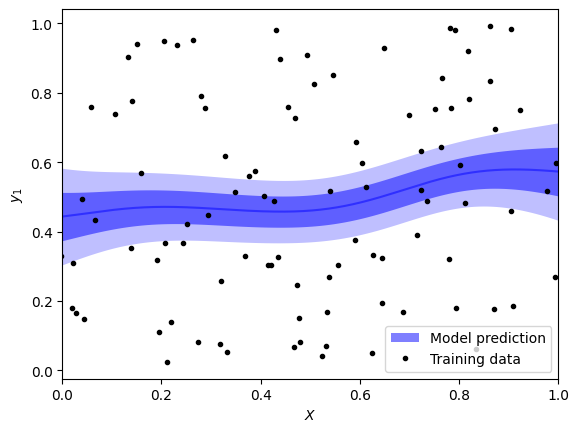

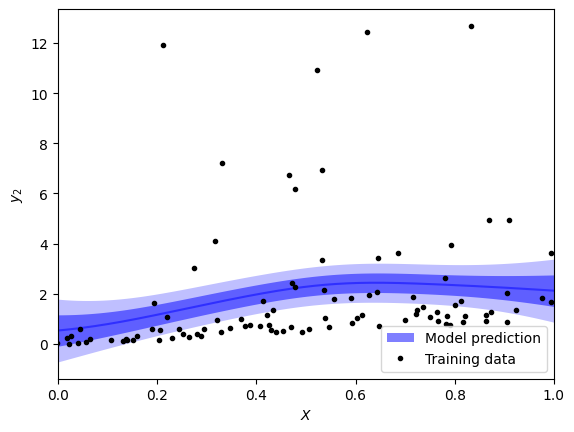

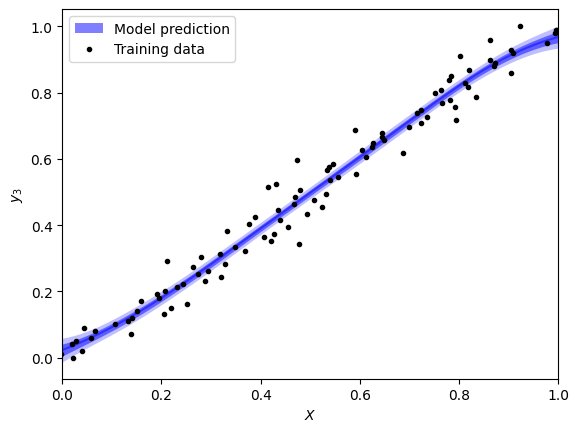

          X
0     0.000
1     0.001
2     0.002
3     0.003
4     0.004
...     ...
996   0.996
997   0.997
998   0.998
999   0.999
1000  1.000

[1001 rows x 1 columns]
            y1        y2        y3
0     0.443338  0.533109  0.023412
1     0.443509  0.534948  0.023996
2     0.443681  0.536802  0.024583
3     0.443854  0.538671  0.025171
4     0.444028  0.540555  0.025762
...        ...       ...       ...
996   0.573348  2.128335  0.965733
997   0.573230  2.127067  0.966143
998   0.573111  2.125798  0.966549
999   0.572992  2.124528  0.966952
1000  0.572871  2.123258  0.967352

[1001 rows x 3 columns]
            y1        y2        y3
0     0.069534  0.626018  0.017917
1     0.069349  0.624218  0.017760
2     0.069166  0.622425  0.017604
3     0.068983  0.620638  0.017450
4     0.068801  0.618857  0.017299
...        ...       ...       ...
996   0.069502  0.621917  0.016368
997   0.069679  0.623672  0.016470
998   0.069857  0.625432  0.016573
999   0.070035  0.627197  0.016677
1

In [11]:
# Plot parameters
nsigs = [1, 2]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
for Y, Ylabel in zip(["y1", "y2", "y3"], ["$y_1$", "$y_2$", "$y_3$"]):
    grid = prediction_inputs["X"]
    mean = df_mean[Y]
    err = df_std[Y]
    if plot_model_bands:
        label = "Model prediction"
        plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
        for isig, nsig in enumerate(nsigs):
            plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
    if plot_model_mean:
        label = "Model prediction" if not plot_model_bands else None
        plt.plot(grid, mean, color=color, alpha=alpha, label=label)
    if plot_training_data:
        plt.plot(train_data["X"], train_data[Y], ".", color="black", label="Training data")
    plt.xlim((0., 1.))
    plt.xlabel("$X$")
    plt.ylabel(Ylabel)
    plt.legend()
    plt.show()

print(prediction_inputs)
print(df_mean)
print(df_std)

We can finally remove our dataset and trained model from the twinlab cloud.

In [12]:
# Delete campaign and dataset (if desired)
tl.delete_campaign(campaign_id, verbose=True)
tl.delete_dataset(dataset_id, verbose=True)

Response: three_outputs campaign deleted successfully

Response: three_outputs.csv dataset and summary deleted successfully



These results show that it is very difficult to determine two numbers just based on their quotient, as there are many values they can take.